In [8]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import *

In [2]:
!pip install qiskit

     |████████████████████████████████| 8.5MB 11.2MB/s 
     |████████████████████████████████| 17.6MB 252kB/s 
     |████████████████████████████████| 204kB 35.5MB/s 
     |████████████████████████████████| 204kB 50.2MB/s 
     |████████████████████████████████| 2.1MB 36.9MB/s 
     |████████████████████████████████| 5.9MB 44.8MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 1.3MB 44.7MB/s 
     |████████████████████████████████| 194kB 54.5MB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
     |████████████████████████████████| 614kB 51.8MB/s 
     |████████████████████████████████| 102kB 10.4MB/s 
     |████████████████████████████████| 2.6MB 57.2MB/s 
     |████████████████████████████████| 5.5MB 41.9MB/s 
  Created wheel for qiskit: filename=qiskit-0.23.2-cp36-none-any.whl size=2876 sha256=396816d39526154348a857d64417529fc69ad2b9b8ac2e6fd506a18896c76ce4
  Stored in directory: /root/.cache/pip/wheels/c2/62/3e/d5aeec3b19ba0

Create Quantum and Classical **register**

In [12]:
cr = ClassicalRegister(2)
qr = QuantumRegister(2)
circuit = QuantumCircuit(cr,qr)

Bell State **Circuit**

In [6]:
!pip install pylatexenc

     |████████████████████████████████| 163kB 12.3MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.8-cp36-none-any.whl size=131377 sha256=ce88c45184617026aa14bb9a84f2683357c3a96b90cedd7250b190fab07dbcac
  Stored in directory: /root/.cache/pip/wheels/88/23/90/4cf49f59c1eb67af40a2b3a580536bb5f91d40bc0d4cc8e035
Successfully built pylatexenc


In [16]:
circuit.h(0)
circuit.cx(0,1)

%matplotlib inline
circuit.draw(output = None)

┌───┐     ┌───┐     ┌───┐     
q1_0: ┤ H ├──■──┤ H ├──■──┤ H ├──■──
      └───┘┌─┴─┐└───┘┌─┴─┐└───┘┌─┴─┐
q1_1: ─────┤ X ├─────┤ X ├─────┤ X ├
           └───┘     └───┘     └───┘
c1: 2/══════════════════════════════

Spin-**up**

In [23]:
u = np.matrix([[1],[0]])

##Identity Matrix
I = np.matrix([[1,0],
               [0,1]])

##Hadamard gate
H = np.matrix([[1,1],
               [1,-1]])/np.sqrt(2)

##Initial state vector
psi = np.kron(u,u)

##XI Gate
HI = np.kron(H,I)

##CNOT
CNOT = np.matrix([[1,0,0,0],
                  [0,1,0,0],
                  [0,0,0,1],
                  [0,0,1,0]])

##Circuit Operation
print(CNOT*HI*psi)

[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]]


In [24]:
import networkx as nx
from qiskit.visualization import plot_bloch_multivector

In [26]:
##Graph State
def graph_state_measure(G):
  qr1 = QuantumRegister(len(G.nodes))
  cr1 = ClassicalRegister(len(G.nodes))
  circuit1 = QuantumCircuit(qr1,cr1)

  ##Applying Hadamard gate
  for vertex in G.nodes:
    circuit1.h(vertex)

  for x,y in G.edges():
    circuit1.cz(x,y)
  return circuit1

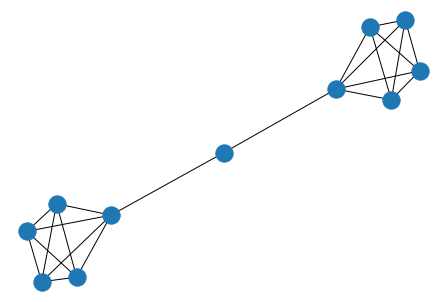

In [29]:
G = nx.barbell_graph(5,1)
nx.draw(G)